# Segmenting with cellpose

In [39]:
# !pip install git+https://github.com/epigen-UCSD/merfish_tools.git

##### Import required packages

In [1]:
import sys
import os
import mftools

## Load Config

In [ ]:
CONFIG_PATH = "config.ini"
config = pipe.load_config(CONFIG_PATH)

# load IO configuration options
io_config = config['IO Options']
MERSCOPE_DIR = io_config['merscope']
RAW_IMAGE_DATA = io_config['mer_raw_data']
MERFISH_OUT = io_config['mer_out']
CELLPOSE_OUT = io_config['cellpose']
MASKS_OUT = io_config['masks']



# load cellpose configuration options
cellpose_config = config['Cellpose']
Z_SLICE = cellpose_config['z_slice']
CHANNEL = cellpose_config['channel']

In [3]:
# Check directory structure
dir_paths = pipe.assemble_directory_paths()

needed_dirs = [MERSCOPE_DIR, RAW_IMAGE_DATA, CELLPOSE_OUT, MASKS_OUT]
print(needed_dirs)
for path in needed_dirs:
    os.makedirs(path, exist_ok=True)

    if os.path.exists(path):
        if not os.access(path, os.W_OK) or not os.access(path, os.R_OK):
            raise RuntimeError(f"You do not have read/write permissions in directory \"{path}\"")
    else:
        raise RuntimeError(f"Attempted to create \"{path}\" but failed. Check that you have permission.")


<class 'str'>
<class 'str'>
{'flags': 'snakemake/flags', 'image_dataset': './mnt/merfish15/MERSCOPE/raw_data/202402231855_20240223M140BICANRen6_VMSC10002', 'expiriment_out': './mnt/merfish15/MERSCOPE/output/202402231855_20240223M140BICANRen6_VMSC10002', 'cellpose_out': './mnt/merfish15/MERSCOPE/output/202402231855_20240223M140BICANRen6_VMSC10002/cellpose', 'masks_out': './mnt/merfish15/MERSCOPE/output/202402231855_20240223M140BICANRen6_VMSC10002/cellpose/masks'}
['snakemake/flags', './mnt/merfish15/MERSCOPE/raw_data/202402231855_20240223M140BICANRen6_VMSC10002', './mnt/merfish15/MERSCOPE/output/202402231855_20240223M140BICANRen6_VMSC10002', './mnt/merfish15/MERSCOPE/output/202402231855_20240223M140BICANRen6_VMSC10002/cellpose', './mnt/merfish15/MERSCOPE/output/202402231855_20240223M140BICANRen6_VMSC10002/cellpose/masks']


In [55]:
from merfish_tools.mftools.fileio import ImageDataset

In [43]:
# Use file path like format ("/mnt/merfish12/MERSCOPE/merfish_raw_data/202401261424_20240126M134UWA7648CX22PuS6_VMSC10102")
imageset = ImageDataset(RAW_IMAGE_DATA)

In [44]:
from merfish_tools.mftools.segmentation import CellSegmentation

In [45]:
seg = CellSegmentation(imagedata=imageset, channel=CHANNEL, zslice=Z_SLICE)

In [47]:
# index seg to access the mask for that FOV
mask = seg[500]

In [48]:
dapi = imageset.load_image(channel="DAPI", fov=500, max_projection=True)

(-0.5, 2047.5, 2047.5, -0.5)

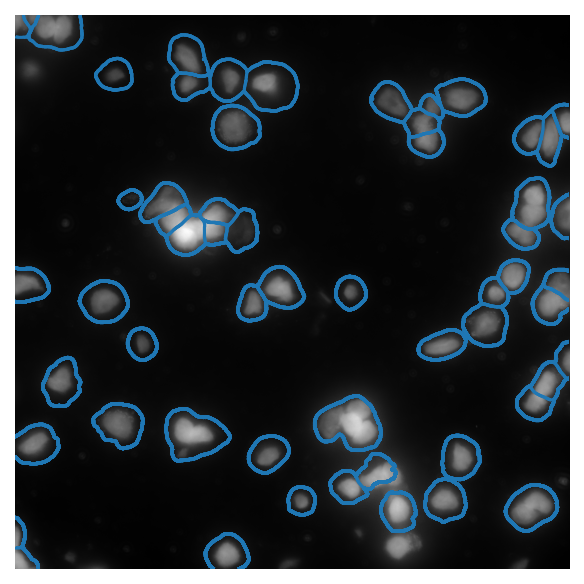

In [49]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(dpi=150)
plt.imshow(dapi, cmap="gray")
plt.contour(mask, [x+0.5 for x in np.unique(mask)], colors="tab:blue")
plt.axis("off")

In [50]:
from skimage.measure import regionprops

centroids = np.array([cell.centroid for cell in regionprops(mask)])

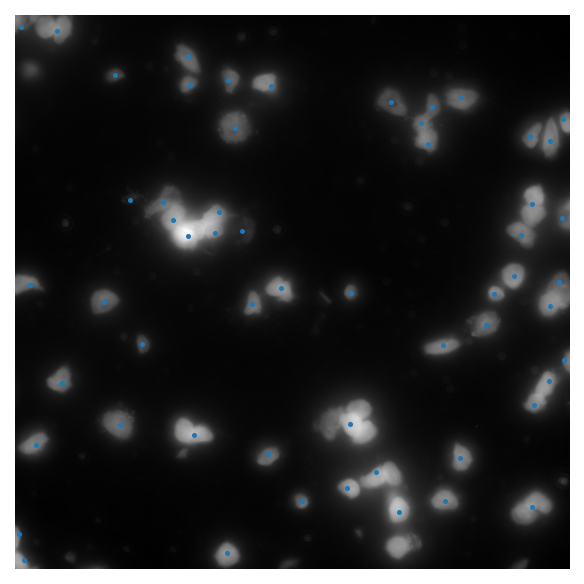

In [51]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(dpi=150)
plt.imshow(dapi, cmap="gray")
plt.scatter(centroids[:,1], centroids[:,0], c="tab:blue", s=2)
plt.axis("off");

In [52]:
# save the segmentations to mask, This should be in MERSCOPE/Output/
# seg = CellSegmentation("/mnt/merfish4v1/RNA_MERFISH/MERSCOPE/Output/202212021545_20221202M064BA19S09352_VMSC02201_cellpose/masks", imagedata=imageset)

# seg = CellSegmentation("/mnt/merfish10/RNA_MERFISH/MERSCOPE/Output/202310081756_20231008M114MUSLivSenTS2_VMSC10102/cellpose/masks", imagedata=imageset, channel="DAPI", zslice=3)
# seg = CellSegmentation("/mnt/merfish10/RNA_MERFISH/MERSCOPE/Output/202310082020_20231008M113MUSLivSenTS1_VMSC10002/cellpose/masks", imagedata=imageset, channel="DAPI", zslice=3)
# seg = CellSegmentation("/mnt/merfish10/RNA_MERFISH/MERSCOPE/Output/202310201605_20231020M117MUSMBrSenTS2_VMSC10002/cellpose/masks", imagedata=imageset, channel="DAPI", zslice=3)
# seg = CellSegmentation("/mnt/merfish12/MERSCOPE/merfish_output/202401261424_20240126M134UWA7648CX22PuS6_VMSC10102/cellpose/masks", imagedata=imageset, channel="DAPI", zslice=3)
seg = CellSegmentation(mask_folder=MASKS_OUT, 
                       imagedata=imageset, 
                       channel=CHANNEL, 
                       zslice=Z_SLICE)
seg.segment_fov(500)

/home/eboone/ENTER/envs/mfautmation/lib/python3.11/site-packages/cellpose/plot.py:43: RuntimeWarning: overflow encountered in square
  mag = np.clip(transforms.normalize99(np.sqrt(np.sum(dP**2,axis=0))), 0, 1.)
/home/eboone/ENTER/envs/mfautmation/lib/python3.11/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/eboone/ENTER/envs/mfautmation/lib/python3.11/site-packages/cellpose/plot.py:58: RuntimeWarning: invalid value encountered in cast
  im = (np.clip(im, 0, 1) * 255).astype(np.uint8)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

__Generating a new cell by gene table__